# Utilisation de Python pour résoudre une équation différentielle

chute verticale 1D - sans frottements
axe Oy orienté vers le bas ainsi : y, vy et ay sont positifs
sol situé à la position h avec origine située au point de lacher de l'objet 

fichier original : http://culturesciencesphysique.ens-lyon.fr/ressource/chute-libre-python-1.xml

In [5]:
# installation des bibliothèques
!pip install numpy
!pip install matplotlib

%matplotlib inline

In [6]:
# import de la bibliothèque numpy (gestion de matrices et routines mathématiques) en lui donnant le surnom np
import numpy as np
# import de la bibliothèque matplotlib (graphiques) en lui donnant le surnom plt
import matplotlib.pyplot as plt

## Initialisation et définition des paramètres de simulation

In [12]:
# accélération de la pesanteur 9,81 N.m-2
g = 9.81

# définition du pas de temps = 0,001 seconde
dt = 0.001

# rayon de la balle (en m)
r = 0.003
# ordonnée initiale du corps (en m)    
y_0 = 0

# hauteur de chute (en m)
h = 0.5 

# vitesse verticale initiale du corps (en m/s)
vy_0 = 0

## Mise en place de la boucle à éxécuter 

La balle a atteint le sol en 0.318 s
Le calcul a réalisé 318 itérations avec un pas de temps de 0.001 s


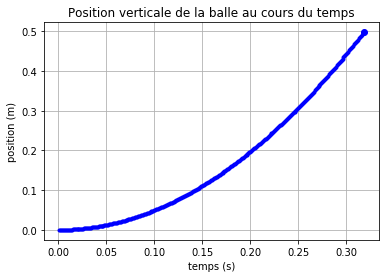

In [13]:
# Initialisation des variables de calcul

# ordonnée initiale = y0
y = y_0
# vitesse verticale initiale = vy_0
vy = vy_0

# Calcul du mouvement
i = 0        # indice de la boucle
temps = 0    # compteur de temps

# La boucle est exécutée tant que le corps n'a pas touché le sol :
# (tant que la position y de son centre d'inertie est supérieure à son rayon)
while (y < (h-r) ) :
    vy = vy + g*dt
    y = y + vy*dt
    
    i = i + 1
    temps = temps + dt
    
    plt.plot(temps,y,"b.")
    
plt.title("Position verticale de la balle au cours du temps")
plt.xlabel("temps (s)")  
plt.ylabel("position (m)")
plt.grid(True)
plt.plot(temps,y,"bo", label="résolution numérique") # on fait apparaitre la légende correpondante

print("La balle a atteint le sol en",round(temps,3), "s")
print("Le calcul a réalisé",i,"itérations avec un pas de temps de",dt,"s")

## Résolution analytique

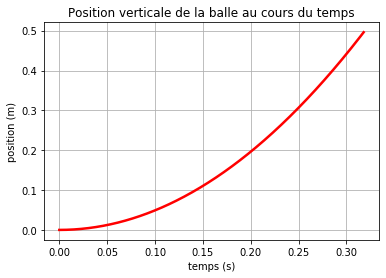

In [15]:
temps_analyt = np.linspace(0,temps,500)   
y_analyt =  1/2 * g * temps_analyt **2 + vy_0 * temps_analyt + y_0

plt.title("Position verticale de la balle au cours du temps")
plt.xlabel("temps (s)")  
plt.ylabel("position (m)")
plt.grid(True)
plt.plot(temps_analyt,y_analyt,"-r", lw=2.5, label="résolution analytique")

# Résolution numérique avec l'utilisation des listes

Cette méthode permet de conserver les valeurs dans des listes pour les réutiliser ensuite

In [16]:
# import de la bibliothèque numpy (gestion de matrices et routines mathématiques) en lui donnant le surnom np
import numpy as np
# import de la bibliothèque matplotlib (graphiques) en lui donnant le surnom plt
import matplotlib.pyplot as plt

In [17]:
# accélération de la pesanteur 9,81 N.m-2
g = 9.81

# définition du pas de temps = 0,001 seconde
dt = 0.001

# rayon de la balle (en m)
r = 0.003
# ordonnée initiale du corps (en m)    
y_0 = 0

# hauteur de chute (en m)
h = 0.5 

# vitesse verticale initiale du corps (en m/s)
vy_0 = 0

In [20]:
# Initialisation des variables de calcul

# ordonnée initiale = y0
y = y_0
# on crée un vecteur qui va contenir toutes les positions successives au cours du mouvement
position_y = [y]
# vitesse verticale initiale = vy_0
vy = vy_0
# on crée un vecteur qui va contenir toutes les vitesses successives au cours du mouvement
vitesse_y = [vy]

# Calcul du mouvement
i = 0        # indice de la boucle

# La boucle est exécutée tant que le corps n'a pas touché le sol :
# (tant que la position y de son centre d'inertie est supérieure à son rayon)
while (y < (h-r) ) :
    vy = vy + g*dt
    vitesse_y = vitesse_y + [vy]

    y = y + vy*dt
    position_y = position_y + [y]
    
    i = i + 1

temps = np.linspace(0,i,i+1)*dt    
print("La balle a atteint le sol en",round(temps[i],3), "s")
print("Le calcul a réalisé",i,"itérations avec un pas de temps de",dt,"s")

La balle a atteint le sol en 0.318 s
Le calcul a réalisé 318 itérations avec un pas de temps de 0.001 s


In [ ]:
# des tableaux de nombres sont ainsi stockés en mémoire
#position_y

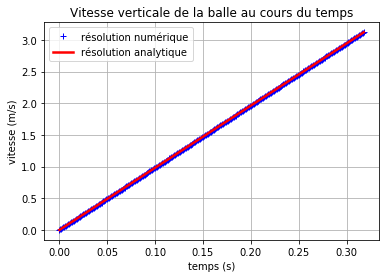

In [22]:
# Représentation graphique de la vitesse
plt.plot(temps,vitesse_y,"b+",label="résolution numérique")

# Résolution analytique
nb_pts = int(1000/temps[i])
temps_analyt = np.linspace(0,temps[i],nb_pts)
vy_analyt =  g * temps_analyt + vy_0 

plt.plot(temps_analyt,vy_analyt,"-r", lw=2.5, label="résolution analytique")
plt.legend()
plt.title("Vitesse verticale de la balle au cours du temps")
plt.xlabel("temps (s)")  
plt.ylabel("vitesse (m/s)")
plt.grid(True)

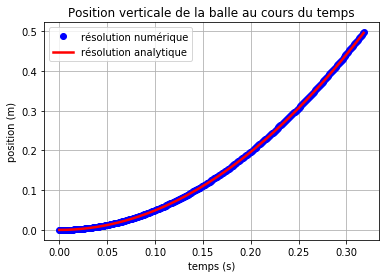

In [23]:
# Représentation graphique de la trajectoire
plt.plot(temps,position_y,"bo",label="résolution numérique")

# Résolution analytique
nb_pts = int(1000/temps[i])
temps_analyt = np.linspace(0,temps[i],nb_pts)
y_analyt =  1/2 * g * temps_analyt **2 + vy_0 * temps_analyt + y_0

plt.plot(temps_analyt,y_analyt,"-r", lw=2.5, label="résolution analytique")
plt.legend()
plt.title("Position verticale de la balle au cours du temps")
plt.xlabel("temps (s)")  
plt.ylabel("position (m)")
plt.grid(True)